
## <b>1 <span style='color:#e61227'>|</span> Data Augmention</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.1 |</span></b> Install And Import Essential Libreries </b></p>
</div>

In [27]:
import os
import random
import numpy as np
from PIL import Image
from tqdm import tqdm
import datetime
import getpass
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Augmentation
from data_augmention.RandomRain import RandomRain
from data_augmention.RandomFlare import RandomFlare
from data_augmention.RandomSnow import RandomSnow
from data_augmention.RandomFog import RandomFog
#from data_augmention.RandomCrop import RandomCrop
#from data_augmention.RandomTranslation import RandomTranslation
from data_augmention.RandomBlur import RandomBlur
from data_augmention.RandomBrightness import RandomBrightnessContrast
from data_augmention.HideAndSeek import HideAndSeek
from data_augmention.Randomnoise import GaussianNoise
from data_augmention.RandomShadow import RandomShadow
from data_augmention.RandomGridMask import GridMask
from data_augmention.Segment import MeanShiftSegmentation

# Preprocessing
from data_preprocessing.convertcsv import createcsv

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.2 |</span></b> Data Loading and Augmentation for Image Dataset </b></p>
</div>

In [28]:
def load_data(input_dir):
    image_dir = os.path.join(input_dir, "train",'images')
    label_dir = os.path.join(input_dir, "train", 'labels')
    images = sorted(os.listdir(image_dir))
    labels = sorted(os.listdir(label_dir))
    assert len(images) == len(labels), "Number of images and labels must be the same"
    image_paths = [os.path.join(image_dir, img) for img in images]
    label_paths = [os.path.join(label_dir, lbl) for lbl in labels]
    return image_paths, label_paths

# Function to save augmented image and label
def save_data(output_image_dir, output_label_dir, image_name, augmented_image, label_content):
    os.makedirs(output_image_dir, exist_ok=True)
    os.makedirs(output_label_dir, exist_ok=True)
    output_image_path = os.path.join(output_image_dir, image_name)
    augmented_image.save(output_image_path)
    label_name = image_name.replace('.jpg', '.txt')
    output_label_path = os.path.join(output_label_dir, label_name)
    with open(output_label_path, 'w') as f:
        f.write(label_content)

def readlabel(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
        bboxes = []
        for line in lines:
            parts = line.strip().split()
            bbox = {
                'class': int(float(parts[0])),
                'x': float(parts[1]),
                'y': float(parts[2]),
                'w': float(parts[3]),
                'h': float(parts[4]),
            }
            bboxes.append(bbox)
        return bboxes

# Function to augment images and save
# def augment_and_save(image_paths, label_paths, output_image_dir, output_label_dir, num_images_to_augment, augmentations_per_image, augmentation_methods):
#     available_augmenters = {
#         'rain': RandomRain(),
#         'flare': RandomFlare(),
#         'snow': RandomSnow(),
#         'fog': RandomFog(),
#         #'crop': RandomCrop(),
#         #'translation': RandomTranslation(),
#         'blur': RandomBlur(),
#         'brightness': RandomBrightnessContrast(),
#         'hideandseek': HideAndSeek(),
#         'noise': GaussianNoise(),
#         'shadow': RandomShadow(),
#         'gridmask': GridMask(),
#         'segment': MeanShiftSegmentation()
#     }
    
#     # create varriable to store the user name
#     selected_augmenters = {name: available_augmenters[name] for name in augmentation_methods}
#     selected_indices = np.random.choice(len(image_paths), num_images_to_augment, replace=False)

#     for idx in tqdm(selected_indices, desc='Augmenting images'):
#         image_path = image_paths[idx]
#         label_path = label_paths[idx]

#         image = Image.open(image_path)
#         with open(label_path, 'r') as f:
#             label_content = f.read()

#         for j in range(augmentations_per_image):
#             # Randomly choose an augmentation technique
#             augmentation_method_name = random.choice(list(selected_augmenters.keys()))
#             augmentation_method = selected_augmenters[augmentation_method_name]
#             # Apply augmentation
#             augmented_image = augmentation_method(image)
#             # Generate unique filename for augmented image
#             original_filename = os.path.splitext(os.path.basename(image_path))[0]
#             # image_name = f'{augmentation_method_name}_{original_filename}
#             image_name = f'{augmentation_method_name}_{original_filename}.jpg'  
#             save_data(output_image_dir, output_label_dir, image_name, augmented_image, label_content)
def augment_and_save(image_paths, label_paths, output_image_dir, output_label_dir, num_images_to_augment, augmentations_per_image, augmentation_methods):
    available_augmenters = {
        'rain': RandomRain(),
        'flare': RandomFlare(),
        'snow': RandomSnow(),
        'fog': RandomFog(),
        #'crop': RandomCrop(),
        #'translation': RandomTranslation(),
        'blur': RandomBlur(),
        'brightness': RandomBrightnessContrast(),
        'hideandseek': HideAndSeek(),
        'noise': GaussianNoise(),
        'shadow': RandomShadow(),
        'gridmask': GridMask(),
        'segment': MeanShiftSegmentation()
    }

    selected_augmenters = {name: available_augmenters[name] for name in augmentation_methods}
    total_augmentation_methods = len(selected_augmenters)
    images_per_method = num_images_to_augment // total_augmentation_methods

    selected_indices = np.random.choice(len(image_paths), images_per_method * total_augmentation_methods, replace=False)

    for i, method_name in enumerate(tqdm(augmentation_methods, desc='Applying augmentation methods')):
        augmentation_method = selected_augmenters[method_name]
        method_indices = selected_indices[i*images_per_method:(i+1)*images_per_method]

        for idx in method_indices:
            image_path = image_paths[idx]
            label_path = label_paths[idx]

            image = Image.open(image_path)
            with open(label_path, 'r') as f:
                label_content = f.read()

            for j in range(augmentations_per_image):
                augmented_image = augmentation_method(image)
                original_filename = os.path.splitext(os.path.basename(image_path))[0]
                image_name = f'{method_name}_{original_filename}.jpg'
                save_data(output_image_dir, output_label_dir, image_name, augmented_image, label_content)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.3 |</span></b> Directory Setup for Data Storage </b></p>
</div>

In [29]:
x = datetime.datetime.now()
datetime_now = x.strftime("%Y%m%d_%H%M%S")
who_created = "trungpq"

# Yolo Format
input_dir = "data(nolargebbox)"
output_dir = f"{datetime_now}_{who_created}"
# check output_dir
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_image_dir = f"{output_dir}/train/images"
output_label_dir = f"{output_dir}/train/labels"
# check output_image_dir and output_label_dir
if not os.path.exists(output_image_dir):
    os.makedirs(output_image_dir)
if not os.path.exists(output_label_dir):
    os.makedirs(output_label_dir)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.4 |</span></b> Image Data Augmentation with User-Defined Methods and Parameters </b></p>
</div>

In [30]:
image_paths, label_paths = load_data(input_dir)

# User input for number of images to augment and augmentations per image
# Enter the number of images to augment: 
num_images_to_augment = 8910 

# Enter the number of augmentations per image
augmentations_per_image = 1 

# Enter the augmentation methods (comma separated, available: rain, flare, snow, fog, blur, brightness, hideandseek, noise, shadow, gridmask, segment)
augmentation_methods = ['rain', 'flare', 'snow', 'fog', 'blur', 'brightness', 'hideandseek', 'noise', 'shadow', 'gridmask', 'segment']

augmentation_methods = [method.strip() for method in augmentation_methods]
augment_and_save(image_paths, label_paths, output_image_dir, output_label_dir, num_images_to_augment, augmentations_per_image, augmentation_methods)


Applying augmentation methods: 100%|██████████| 11/11 [09:42<00:00, 52.99s/it] 


## <b>2 <span style='color:#e61227'>|</span> Data Visualize</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>2.1 |</span></b> Convert to CSV file </b></p>
</div>

In [33]:
# create CSV file
output_csv_path = f"{output_dir}/train.csv"
createcsv(output_image_dir, output_label_dir, output_csv_path)


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>2.2 |</span></b> Data Before Augment </b></p>
</div>

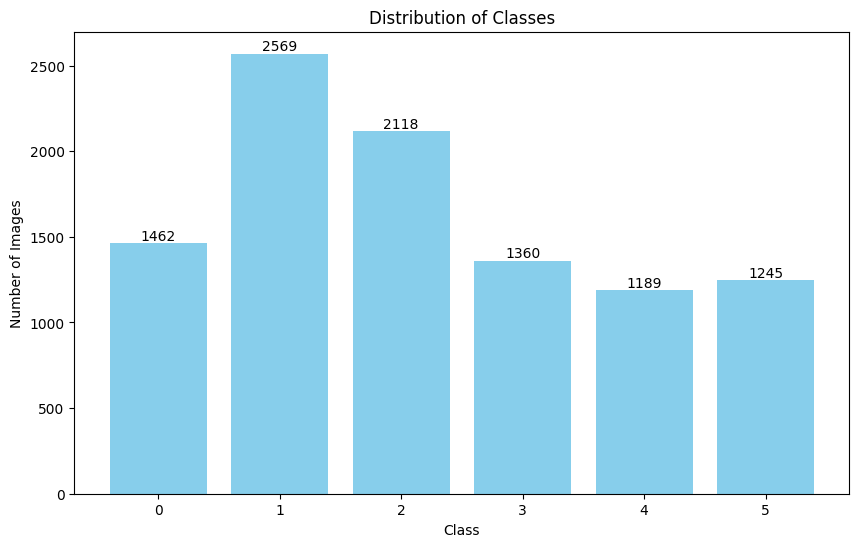

In [34]:
original_path = f"{input_dir}/train/original_data.csv"
data = pd.read_csv(original_path)
class_counts = data['class'].value_counts()
single_color = 'skyblue' 
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=single_color)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes')
plt.xticks(class_counts.index)
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>2.3 |</span></b> Data after augment (excluding initial data) </b></p>
</div>

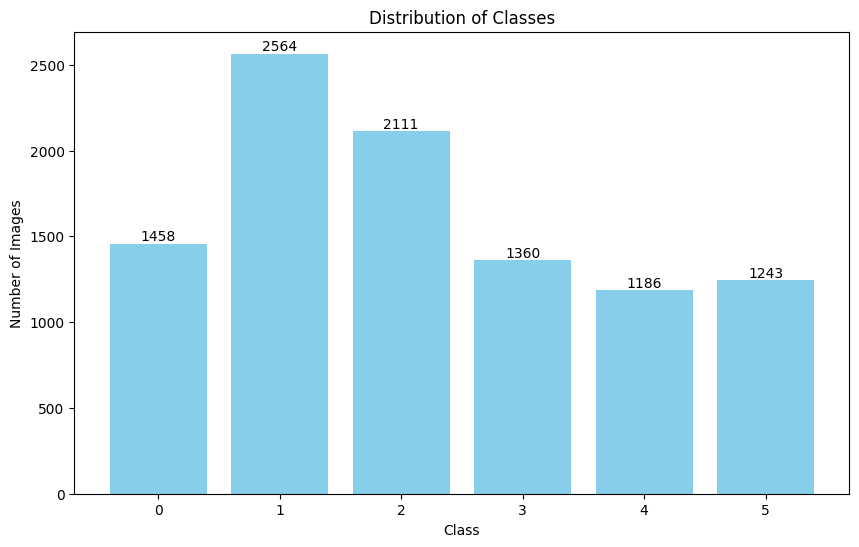

In [35]:
data = pd.read_csv(output_csv_path)
class_counts = data['class'].value_counts()
single_color = 'skyblue' 
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=single_color)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes')
plt.xticks(class_counts.index)
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>2.4 |</span></b> Data after augment (including initial data) </b></p>
</div>

***2.4.1. Combined Original and Augment Data***

In [38]:
import shutil

def combine_datasets(input_dir, output_dir, combined_dir):
    combined_image_dir = os.path.join(combined_dir, "train", "images")
    combined_label_dir = os.path.join(combined_dir, "train", "labels")

    # Create combined directories if they don't exist
    os.makedirs(combined_image_dir, exist_ok=True)
    os.makedirs(combined_label_dir, exist_ok=True)

    # Function to copy files
    def copy_files(src_dir, dst_dir):
        for filename in os.listdir(src_dir):
            src_file = os.path.join(src_dir, filename)
            if os.path.isfile(src_file):
                dst_file = os.path.join(dst_dir, filename)
                shutil.copy2(src_file, dst_file)

    # Copy images and labels from input_dir to combined_dir
    input_image_dir = os.path.join(input_dir, "train", "images")
    input_label_dir = os.path.join(input_dir, "train", "labels")
    copy_files(input_image_dir, combined_image_dir)
    copy_files(input_label_dir, combined_label_dir)

    # Copy images and labels from output_dir to combined_dir
    output_image_dir = os.path.join(output_dir, "train", "images")
    output_label_dir = os.path.join(output_dir, "train", "labels")
    copy_files(output_image_dir, combined_image_dir)
    copy_files(output_label_dir, combined_label_dir)

# Usage
combined_dir = "data_lake"
combine_datasets(input_dir, output_dir, combined_dir)


***2.4.2. Data Distribution After Augment***

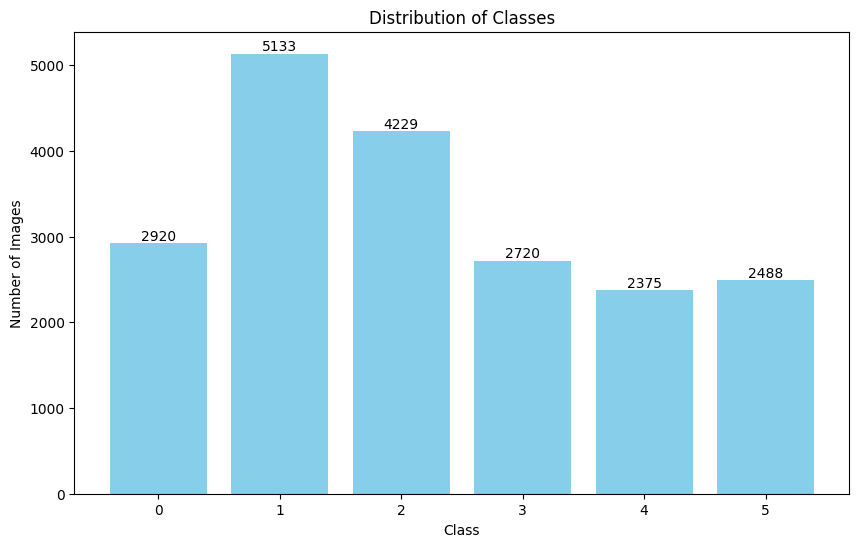

In [43]:
final_csv_path = f"{combined_dir}/train/datalaketrain.csv"
data = pd.read_csv(final_csv_path)
class_counts = data['class'].value_counts()
single_color = 'skyblue' 
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=single_color)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes')
plt.xticks(class_counts.index)
plt.show()

***2.4.3. Show Some Images From Final Dataset***

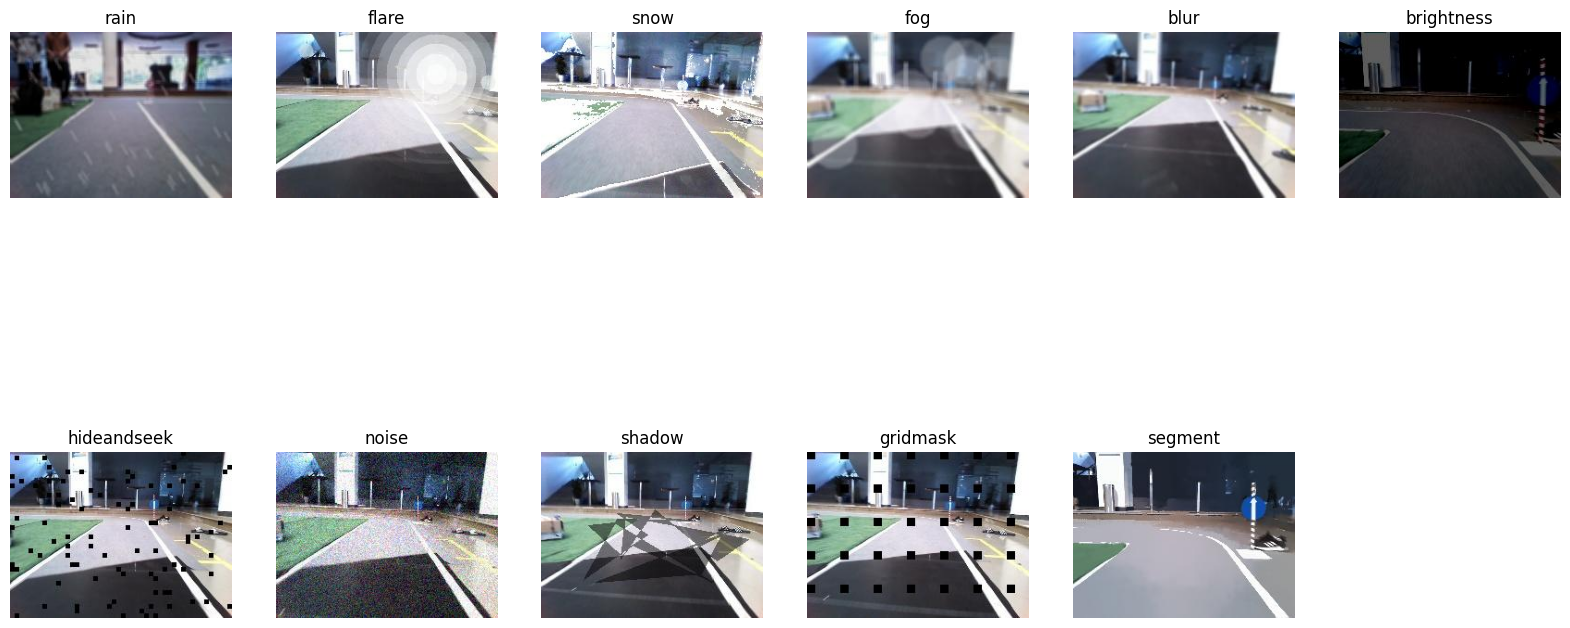

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def display_augmented_images(combined_dir, augmentation_methods):
    # Dictionary to store the paths of one image for each augmentation method
    example_images = {}
    # Loop through the augmentation methods and find one example image for each
    for method in augmentation_methods:
        for root, dirs, files in os.walk(combined_dir):
            for file in files:
                if file.startswith(method) and file.endswith('.jpg'):
                    example_images[method] = os.path.join(root, file)
                    break
    # Plot the example images
    plt.figure(figsize=(20, 10))
    for i, (method, image_path) in enumerate(example_images.items()):
        image = Image.open(image_path)
        plt.subplot(2, (len(example_images) + 1) // 2, i + 1)
        plt.imshow(image)
        plt.title(method)
        plt.axis('off')
    plt.show()

final_dir = f"{combined_dir}/train/images"
augmentation_methods = ['rain', 'flare', 'snow', 'fog', 'blur', 'brightness', 'hideandseek', 'noise', 'shadow', 'gridmask', 'segment']
display_augmented_images(final_dir, augmentation_methods)


## <b>3 <span style='color:#e61227'>|</span> Data Balancing</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3.1 |</span></b> Data processing for balancing traffic signs </b></p>
</div>

***3.1.1 Data Loading and Augmentation for Image Dataset***

In [44]:
# Function to load data
def load_data(input_dir):
    image_dir = os.path.join(input_dir, "images")
    label_dir = os.path.join(input_dir, "labels")
    images = sorted(os.listdir(image_dir))
    labels = sorted(os.listdir(label_dir))
    
    assert len(images) == len(labels), "Number of images and labels must be the same"
    
    image_paths = [os.path.join(image_dir, img) for img in images]
    label_paths = [os.path.join(label_dir, lbl) for lbl in labels]
    
    # Extract classes from labels
    classes = []
    for label_path in label_paths:
        with open(label_path, 'r') as file:
            lines = file.readlines()
            class_id = int(float(lines[0].strip().split()[0]))
            classes.append(class_id)
    
    return image_paths, label_paths, classes

# Function to save augmented image and label
def save_data(output_image_dir, output_label_dir, image_name, augmented_image, label_content):
    os.makedirs(output_image_dir, exist_ok=True)
    os.makedirs(output_label_dir, exist_ok=True)
    output_image_path = os.path.join(output_image_dir, image_name)
    augmented_image.save(output_image_path)
    label_name = image_name.replace('.jpg', '.txt')
    output_label_path = os.path.join(output_label_dir, label_name)
    with open(output_label_path, 'w') as f:
        f.write(label_content)

def readlabel(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
        bboxes = []
        for line in lines:
            parts = line.strip().split()
            bbox = {
                'class': int(float(parts[0])),
                'x': float(parts[1]),
                'y': float(parts[2]),
                'w': float(parts[3]),
                'h': float(parts[4]),
            }
            bboxes.append(bbox)
        return bboxes

# Function to augment images and save
def augment_and_save(image_paths, label_paths, classes, output_image_dir, output_label_dir, num_images_per_class, augmentations_per_image, augmentation_methods):
    available_augmenters = {
        'rain': RandomRain(),
        'flare': RandomFlare(),
        'snow': RandomSnow(),
        'fog': RandomFog(),
        #'crop': RandomCrop(),
        #'translation': RandomTranslation(),
        'blur': RandomBlur(),
        'brightness': RandomBrightnessContrast(),
        'hideandseek': HideAndSeek(),
        'noise': GaussianNoise(),
        'shadow': RandomShadow(),
        'gridmask': GridMask(),
        'segment': MeanShiftSegmentation()
    }

    # selected_augmenters = {name: available_augmenters[name] for name in augmentation_methods}

    # # Filter images and labels by selected classes
    # class_data = {class_id: [(image_paths[i], label_paths[i]) for i in range(len(image_paths)) if classes[i] == class_id] for class_id in num_images_per_class.keys()}

    # existing_images = set(os.listdir(output_image_dir))
    # existing_labels = set(os.listdir(output_label_dir))

    # for class_id, num_images_to_augment in num_images_per_class.items():
    #     filtered_data = class_data[class_id][:num_images_to_augment]

    #     for image_path, label_path in tqdm(filtered_data, desc=f'Augmenting class {class_id} images'):
    #         # Check if image name only contains digits (original image)
    #         original_filename = os.path.splitext(os.path.basename(image_path))[0]
    #         if not original_filename.isdigit():
    #             continue  # Skip if image name contains non-digits

    #         image = Image.open(image_path)
    #         with open(label_path, 'r') as f:
    #             label_content = f.read()

    #         for _ in range(augmentations_per_image):
    #             # Randomly choose an augmentation technique
    #             augmentation_method_name = random.choice(list(selected_augmenters.keys()))
    #             augmentation_method = selected_augmenters[augmentation_method_name]
    #             # Apply augmentation
    #             augmented_image = augmentation_method(image=image)
    #             # Generate unique filename for augmented image
    #             image_name = f'{augmentation_method_name}_{original_filename}.jpg'

    #             # Ensure no duplicate images in output directory
    #             if image_name not in existing_images:
    #                 save_data(output_image_dir, output_label_dir, image_name, augmented_image, label_content)
    #                 existing_images.add(image_name)

    # Shuffle augmentation methods
    random.shuffle(augmentation_methods)

    # Filter images and labels by selected classes
    class_data = {class_id: [(image_paths[i], label_paths[i]) for i in range(len(image_paths)) if classes[i] == class_id] for class_id in num_images_per_class.keys()}

    existing_images = set(os.listdir(output_image_dir))
    existing_labels = set(os.listdir(output_label_dir))

    for class_id, num_images_to_augment in num_images_per_class.items():
        filtered_data = class_data[class_id][:num_images_to_augment]

        for image_path, label_path in tqdm(filtered_data, desc=f'Augmenting class {class_id} images'):
            # Check if image name only contains digits (original image)
            original_filename = os.path.splitext(os.path.basename(image_path))[0]
            if not original_filename.isdigit():
                continue  # Skip if image name contains non-digits

            image = Image.open(image_path)
            with open(label_path, 'r') as f:
                label_content = f.read()

            applied_augmentations = set()

            for _ in range(augmentations_per_image * len(augmentation_methods)):
                # Randomly choose an augmentation technique that hasn't been applied yet
                available_methods = [method for method in augmentation_methods if method not in applied_augmentations]
                if not available_methods:
                    break

                augmentation_method_name = random.choice(available_methods)
                applied_augmentations.add(augmentation_method_name)
                augmentation_method = available_augmenters[augmentation_method_name]
                # Apply augmentation
                augmented_image = augmentation_method(image=image)
                # Generate unique filename for augmented image
                image_name = f'{augmentation_method_name}_{original_filename}.jpg'

                # Ensure no duplicate images in output directory
                if image_name not in existing_images:
                    save_data(output_image_dir, output_label_dir, image_name, augmented_image, label_content)
                    existing_images.add(image_name)

                # Check if we've reached the desired number of augmentations per image
                if len(applied_augmentations) >= augmentations_per_image:
                    break

***3.1.2 Directory Setup for Data Storage***

In [47]:
import datetime
x = datetime.datetime.now()
datetime_now = x.strftime("%Y%m%d_%H%M%S")
who_created = "trungpq"
title = "datatrain"

# Yolo Format
input_dir = "data_lake/train"
output_dir = f"{datetime_now}_{who_created}_{title}"
# check output_dir
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_image_dir = f"{output_dir}/train/images"
output_label_dir = f"{output_dir}/train/labels"
# check output_image_dir and output_label_dir
if not os.path.exists(output_image_dir):
    os.makedirs(output_image_dir)
if not os.path.exists(output_label_dir):
    os.makedirs(output_label_dir)

***3.1.3 Image Data Augmentation with User-Defined Methods***

In [48]:
image_paths, label_paths, classes = load_data(input_dir)

# Define the number of images to augment for each class
num_images_per_class = {
    0: 2211,
    1: 0,
    2: 906,
    3: 3000, #2417
    4: 3000, #2758
    5: 3000, #2646
}

# Define the number of augmentations per image
augmentations_per_image = 1

# Define the augmentation methods
augmentation_methods = ['rain', 'flare', 'snow', 'fog', 'blur', 'brightness', 'hideandseek', 'noise', 'shadow', 'gridmask', 'segment']
augmentation_methods = [method.strip() for method in augmentation_methods]

augment_and_save(image_paths, label_paths, classes, output_image_dir, output_label_dir, num_images_per_class, augmentations_per_image, augmentation_methods)


Augmenting class 0 images: 100%|██████████| 2211/2211 [00:11<00:00, 191.93it/s]
Augmenting class 1 images: 0it [00:00, ?it/s]
Augmenting class 5 images: 100%|██████████| 2134/2134 [00:10<00:00, 208.60it/s]


***3.1.4. Combined Augment and Augment Balance Data***

In [49]:
import os
import shutil

def combine_datasets(input_dir, output_dir, combined_dir):
    combined_image_dir = os.path.join(combined_dir, "train", "images")
    combined_label_dir = os.path.join(combined_dir, "train", "labels")

    # Create combined directories if they don't exist
    os.makedirs(combined_image_dir, exist_ok=True)
    os.makedirs(combined_label_dir, exist_ok=True)

    # Function to copy files
    def copy_files(src_dir, dst_dir):
        if os.path.exists(src_dir):  # Check if source directory exists
            for filename in os.listdir(src_dir):
                src_file = os.path.join(src_dir, filename)
                if os.path.isfile(src_file):
                    dst_file = os.path.join(dst_dir, filename)
                    shutil.copy2(src_file, dst_file)
        else:
            print(f"Source directory {src_dir} does not exist.")

    # Copy images and labels from input_dir to combined_dir
    input_image_dir = os.path.join(input_dir, "train", "images")
    input_label_dir = os.path.join(input_dir, "train", "labels")
    copy_files(input_image_dir, combined_image_dir)
    copy_files(input_label_dir, combined_label_dir)

    # Copy images and labels from output_dir to combined_dir
    output_image_dir = os.path.join(output_dir, "train", "images")
    output_label_dir = os.path.join(output_dir, "train", "labels")
    copy_files(output_image_dir, combined_image_dir)
    copy_files(output_label_dir, combined_label_dir)

# Usage
input_dir = "data_lake"  # Modify as needed
output_dir = "20240702_230806_trungpq_datatrain"  # Modify as needed
combined_dir = "final_data"  # Ensure this directory exists
combine_datasets(input_dir, output_dir, combined_dir)



## <b>4 <span style='color:#e61227'>|</span> Data Visualize</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>4.1 |</span></b> Data Distribution After Balance </b></p>
</div>

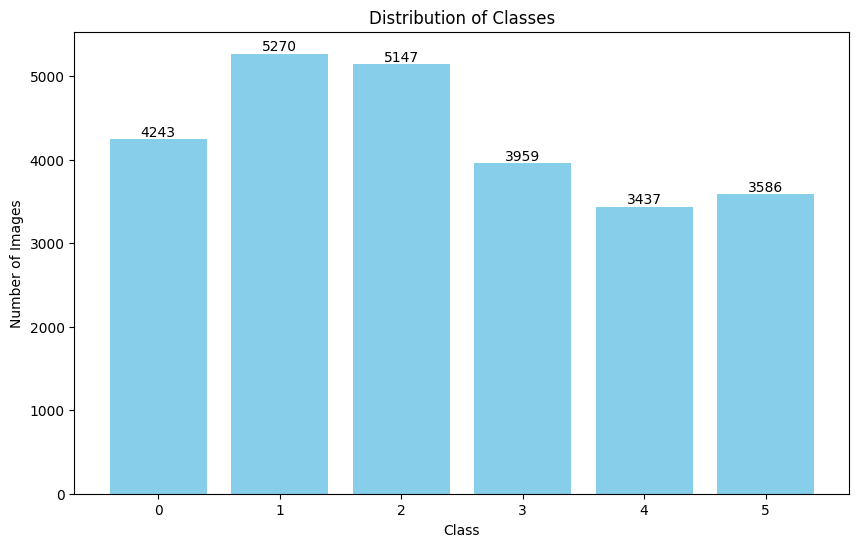

: 

In [51]:
final_csv_path = f"{combined_dir}/finaldatatrain.csv"
data = pd.read_csv(final_csv_path)
class_counts = data['class'].value_counts()
single_color = 'skyblue' 
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=single_color)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes')
plt.xticks(class_counts.index)
plt.show()